In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("..\data\defects_data.csv")
df.head()


,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
0,1,15,Structural,6/6/2024,Component,Minor,Visual Inspection,245.47
1,2,6,Functional,4/26/2024,Component,Minor,Visual Inspection,26.87
2,3,84,Structural,2/15/2024,Internal,Minor,Automated Testing,835.81
3,4,10,Functional,3/28/2024,Internal,Critical,Automated Testing,444.47
4,5,14,Cosmetic,4/26/2024,Component,Minor,Manual Testing,823.64


In [4]:
valores_unicos_columnas = {col: df[col].nunique() for col in df.columns}
valores_unicos_columnas

{'defect_id': 1000,
 'product_id': 100,
 'defect_type': 3,
 'defect_date': 182,
 'defect_location': 3,
 'severity': 3,
 'inspection_method': 3,
 'repair_cost': 996}

In [5]:
df_tipificacion = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]).T.rename(columns = {0: "Card",\
                                                                                                                                 1: "%_Card", 2: "Tipo"})
df_tipificacion
df_tipificacion["Clasificada_como"] = "Categorica" # PArtiendo de que casi todas parecen categóricas
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion

,Card,%_Card,Tipo,Clasificada_como
defect_id,1000,100.0,int64,Numerica Continua
product_id,100,10.0,int64,Numerica Discreta
defect_type,3,0.3,object,Categorica
defect_date,182,18.2,object,Numerica Discreta
defect_location,3,0.3,object,Categorica
severity,3,0.3,object,Categorica
inspection_method,3,0.3,object,Categorica
repair_cost,996,99.6,float64,Numerica Continua


|**Columna/Variable**|**Descripción**|**Tipo_de_Variable**|**Importancia inicial**|**Nota**|
|----------------------|-------------------------------------------|--|--|----------------|
| `defect_id`         | Identificador único de cada defecto           |Indice único | - | no siginifcativo |
| `product_id`        | Identificador del producto                    |Numerica Discreta| 2| no está en el objetivo de este analisis, pero haremos un analisis para saber si hay allguna desviación|
| `defect_type`       | Tipo de defecto                               |Categorica | 1| importante para ver que tipo de defecto es más común y más costoso para poner remedio |
| `defect_date`       | Fecha en la que se detectó el defecto         |Fecha | 3 |  No relevante, aunque haremo un pequeño analisis    |
| `defect_location`   | Ubicación  donde se detectó el defecto  |Categorica |3 | No está en el objetivo |
| `severity`          | Nivel de gravedad                             |Categorica | 0| importante para comparar la gravedad |
| `inspection_method` | Método utilizado para detectar el defecto     |Categorica | 2| haremos un analisis superficial y dependiendo de los datos qui´z necesitamos profundizar más|
| `repair_cost`       | Coste de reparación del defecto               |Numerica continua |0|   relación directa para saber el coste de las reparaciones|


In [10]:
grouped = df.groupby(['defect_type', 'defect_location', 'severity'])['repair_cost'].agg(
    ['mean', 'median', 'std', 'max', 'min']).reset_index()

# Mostrar las primeras filas de la agrupación
grouped

,defect_type,defect_location,severity,mean,median,std,max,min
0,Cosmetic,Component,Critical,505.355588,495.480,311.588714,987.71,10.22
1,Cosmetic,Component,Minor,647.380857,714.630,270.194190,970.37,19.23
2,Cosmetic,Component,Moderate,592.017857,608.260,235.246544,967.29,97.53
3,Cosmetic,Internal,Critical,416.232286,422.030,264.790964,944.63,15.96
4,Cosmetic,Internal,Minor,493.353750,497.885,343.283777,967.35,18.42
5,Cosmetic,Internal,Moderate,572.571429,618.930,303.251805,990.02,67.49
6,Cosmetic,Surface,Critical,484.873947,508.350,271.195932,999.25,13.03
7,Cosmetic,Surface,Minor,491.822308,398.170,311.385678,998.27,18.61
8,Cosmetic,Surface,Moderate,459.676750,494.620,263.845847,960.72,32.44
9,Functional,Component,Critical,590.952821,641.580,288.150452,989.81,32.90


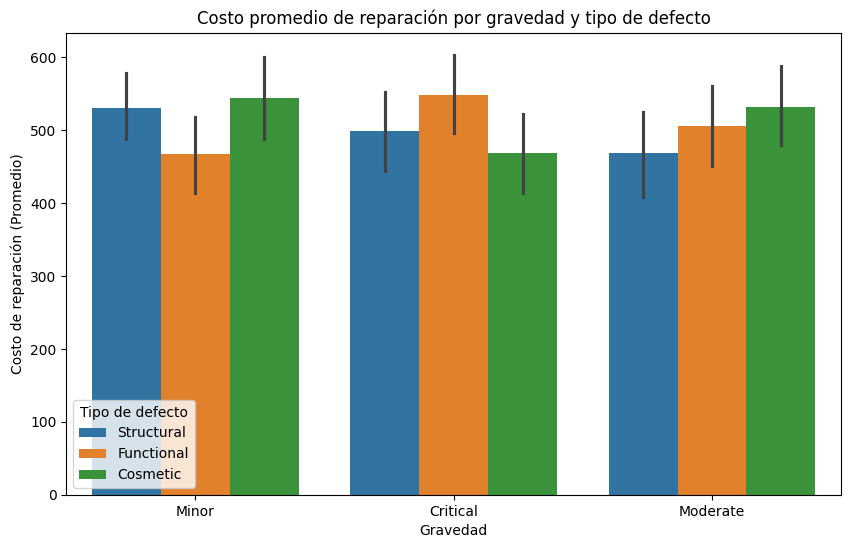

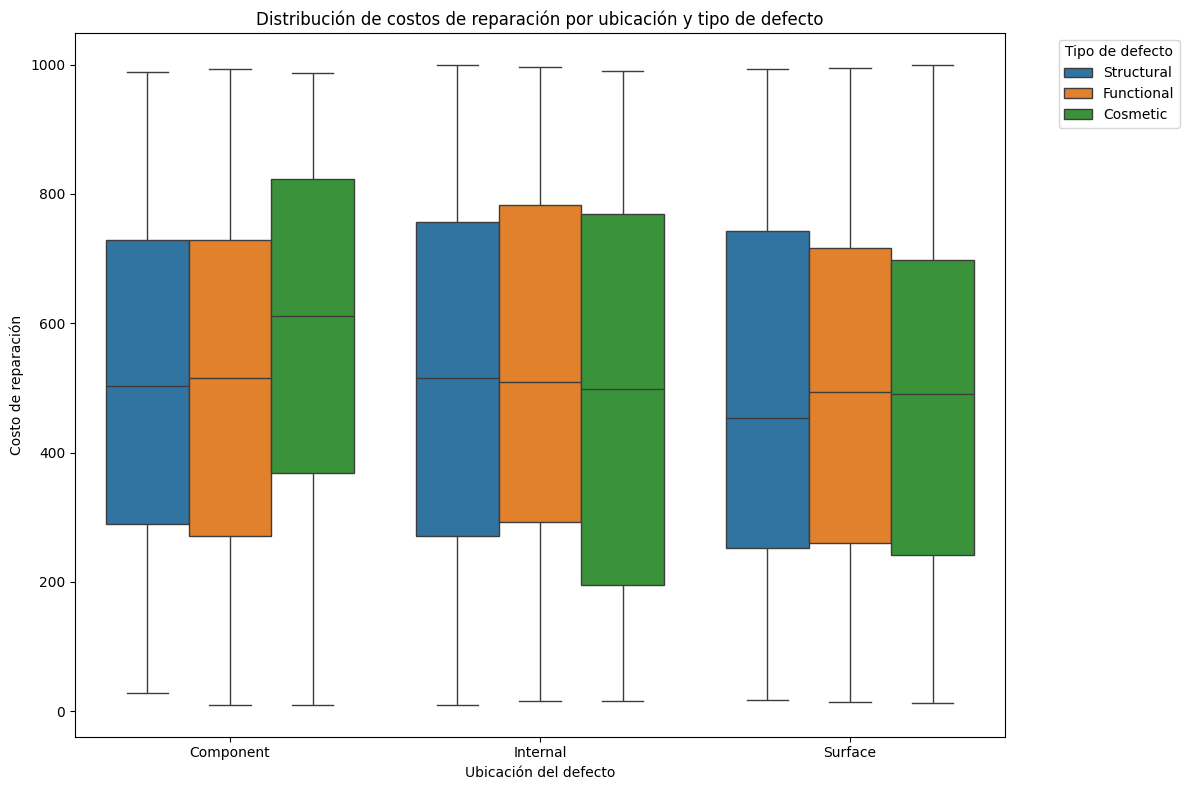

In [ ]:
grouped = df.groupby(['defect_type', 'defect_location', 'severity'])['repair_cost'].agg(
    ['mean', 'median', 'std', 'max', 'min']).reset_index()

# Mostrar las primeras filas de la agrupación
grouped.head()

# Gráfico de barras: promedio de repair_cost por gravedad (severity)
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='severity', y='repair_cost', hue='defect_type')
plt.title('Coste promedio de reparación por gravedad y tipo de defecto')
plt.ylabel('Coste de reparación (Promedio)')
plt.xlabel('Gravedad')
plt.legend(title='Tipo de defecto')
plt.show()

# Gráfico boxplot: análisis detallado por defect_type y defect_location
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='defect_location', y='repair_cost', hue='defect_type')
plt.title('Distribución de costos de reparación por ubicación y tipo de defecto')
plt.ylabel('Costo de reparación')
plt.xlabel('Ubicación del defecto')
plt.legend(title='Tipo de defecto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

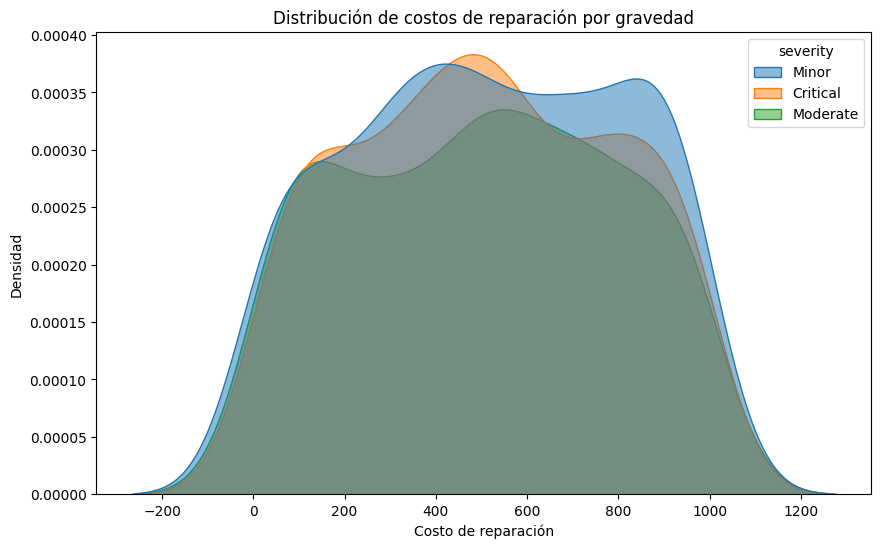

In [43]:
# Gráfico de densidad para `repair_cost` según `severity`
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='repair_cost', hue='severity', fill=True, alpha=0.5)
plt.title('Distribución de costos de reparación por gravedad')
plt.xlabel('Costo de reparación')
plt.ylabel('Densidad')
plt.show()


In [7]:
total_cost = df['repair_cost'].sum()


# Calcular los porcentajes para cada categoría
cost_by_defect_type = df.groupby('defect_type')['repair_cost'].sum()
cost_by_defect_location = df.groupby('defect_location')['repair_cost'].sum()
cost_by_severity = df.groupby('severity')['repair_cost'].sum()
cost_by_severity

severity
Critical    168455.25
Minor       184166.97
Moderate    155004.93
Name: repair_cost, dtype: float64

In [14]:
def plot_donut_df (df):
    #obtenemos los datos para calcuilar los porcetajes
    total_cost = df['repair_cost'].sum()
    cost_by_defect_type = df.groupby('defect_type')['repair_cost'].sum()
    cost_by_defect_location = df.groupby('defect_location')['repair_cost'].sum()
    cost_by_severity = df.groupby('severity')['repair_cost'].sum()

    # Crear un subplot con tres gráficos
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Función para crear gráficos de donut
    def plot_donut(ax, data, labels, title):
        wedges, texts, autotexts = ax.pie(data, 
                                        labels=labels, 
                                        autopct='%1.1f%%', 
                                        startangle=90, 
                                        )
        for autotext in autotexts:
            autotext.set_color('black')
            autotext.set_fontsize(20) 
        ax.set_title(title)

    # Gráfico 1: Porcentaje sobre el coste total por tipo de defecto
    plot_donut(axes[0], cost_by_defect_type, cost_by_defect_type.index, 'Porcentaje del coste total por tipo de defecto')

    # Gráfico 2: Porcentaje sobre el coste total por ubicación del defecto
    plot_donut(axes[1], cost_by_defect_location, cost_by_defect_location.index, 'Porcentaje del coste total por ubicación')

    # Gráfico 3: Porcentaje sobre el coste total por gravedad del defecto
    plot_donut(axes[2], cost_by_severity, cost_by_severity.index, 'Porcentaje del coste total por gravedad')

    # Ajustar el diseño

    plt.show()

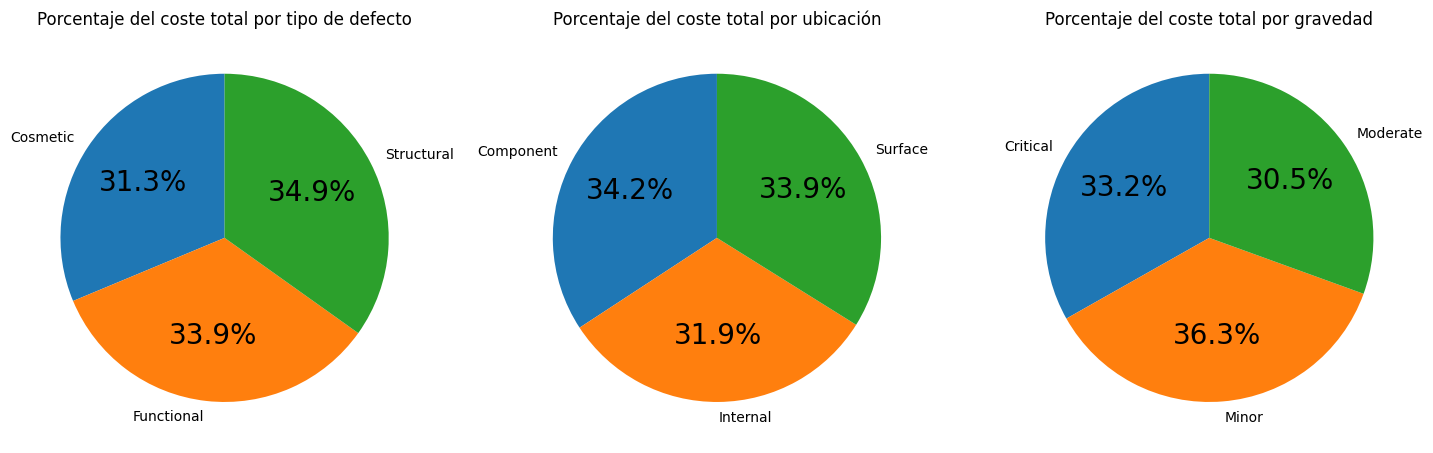

In [15]:
plot_donut_df(df)

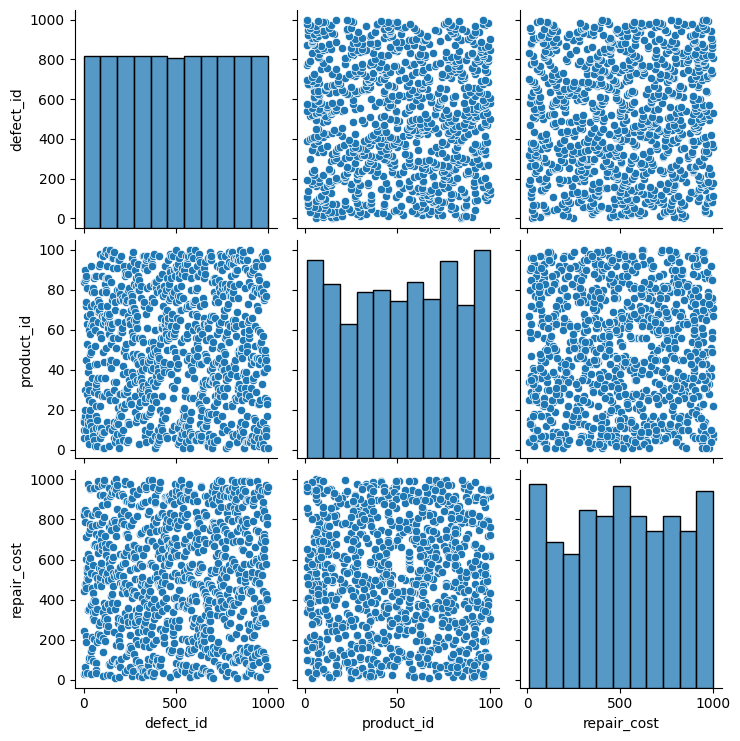

In [32]:
sns.pairplot(df)

In [34]:
sns.histplot(df['gravity'], kde=True)

KeyError: 'gravity'

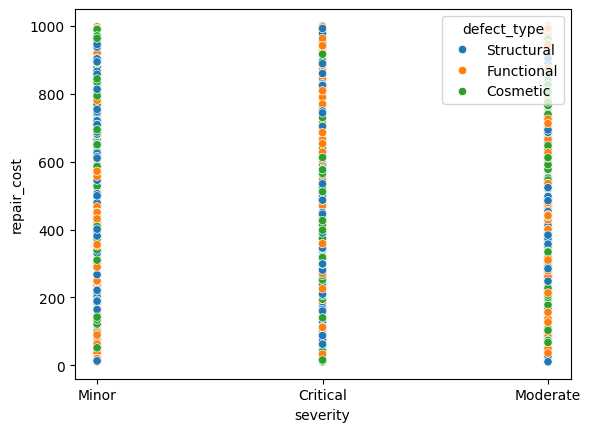

In [30]:
sns.scatterplot(x='severity', y='repair_cost', data=df, hue='defect_type');

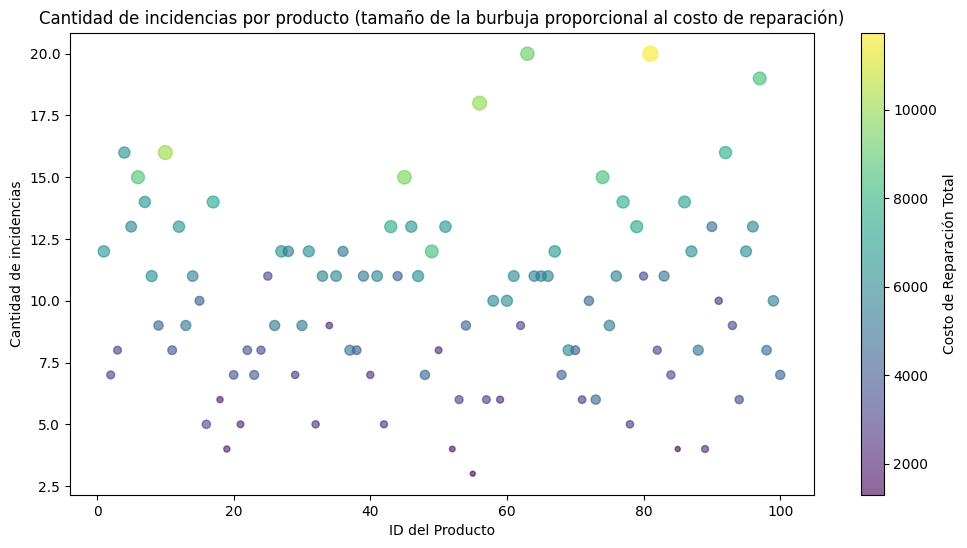

In [13]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Calcular el costo total de reparación por producto
cost_by_product = df.groupby('product_id')['repair_cost'].sum()

# Contar las incidencias (reparaciones) por producto
incidences_by_product = df.groupby('product_id')['repair_cost'].count()

# Ordenar las incidencias de más a menos
incidences_by_product = incidences_by_product.sort_values(ascending=False)

# Obtener el costo de reparación correspondiente a cada producto (usaremos el costo total)
cost_by_product = cost_by_product.loc[incidences_by_product.index]

# Escalar el tamaño de las burbujas (multiplicamos por un factor para hacerlas visibles)
bubble_sizes = cost_by_product * 0.01  # Ajuste de escala para las burbujas

# Normalizar los valores de costo de reparación para la escala de colores
norm = plt.Normalize(cost_by_product.min(), cost_by_product.max())

# Crear la figura y los ejes (ax)
fig, ax = plt.subplots(figsize=(12, 6))

# Crear el gráfico de dispersión con tamaño de burbuja proporcional al costo de reparación
scatter = ax.scatter(incidences_by_product.index, incidences_by_product.values, 
                     s=bubble_sizes, c=cost_by_product, cmap='viridis', norm=norm, alpha=0.6)

# Añadir barra de color (colorbar) para mostrar la escala de colores
cbar = plt.colorbar(scatter)
cbar.set_label('Costo de Reparación Total')

# Título y etiquetas
ax.set_title('Cantidad de incidencias por producto (tamaño de la burbuja proporcional al costo de reparación)')
ax.set_xlabel('ID del Producto')
ax.set_ylabel('Cantidad de incidencias')

# Mostrar el gráfico
plt.show()


In [12]:

# vamos a clasificar los  defectos en 5 grupos según el coste de reparacion
cost_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']  
cost_bins = pd.cut(
    df['repair_cost'], 
    bins=5,  # Dividir en 5 categorías
    labels=cost_labels
)

# Añadir la nueva columna al DataFrame
df['cost_category'] = cost_bins


Very Low


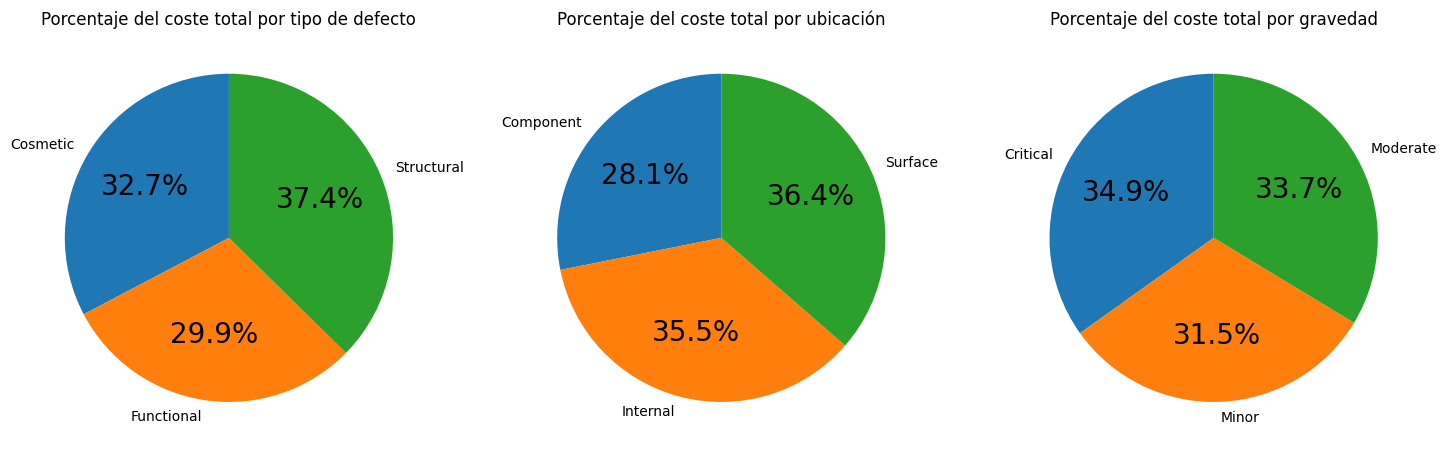

Low


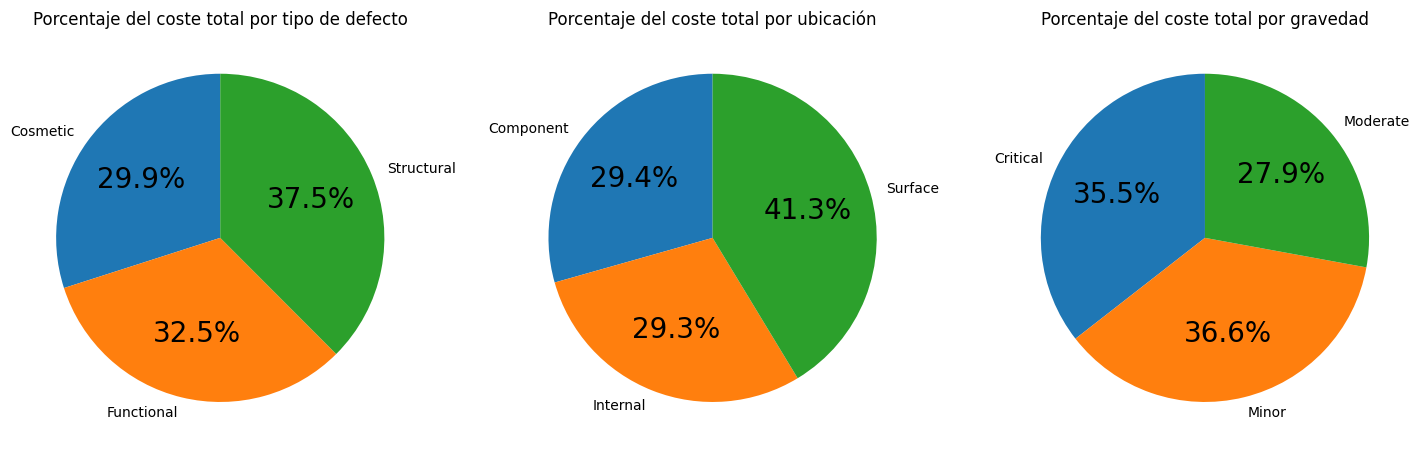

Medium


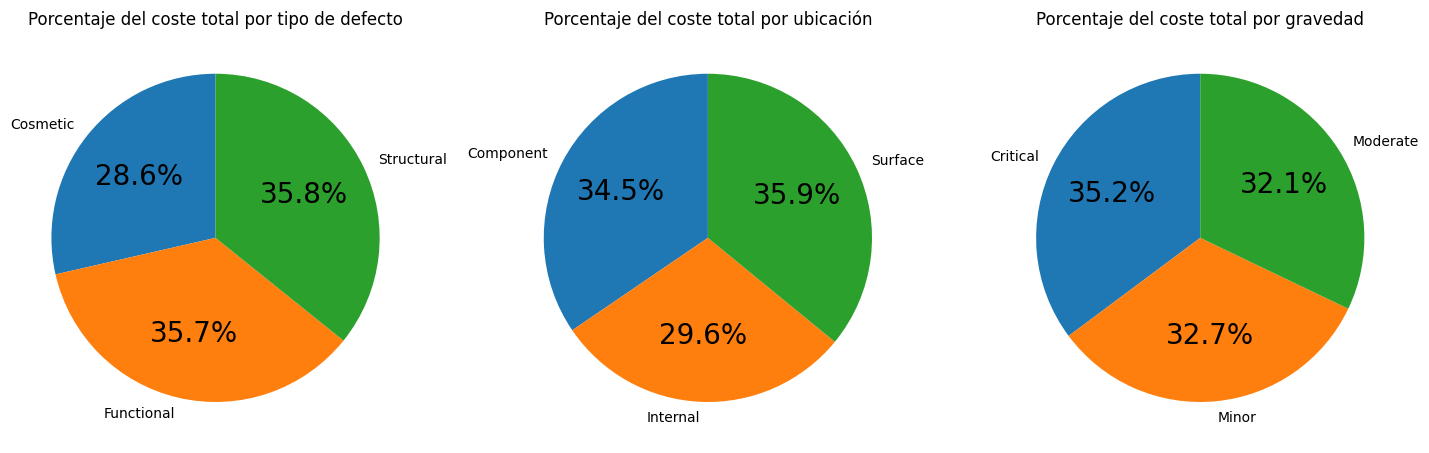

High


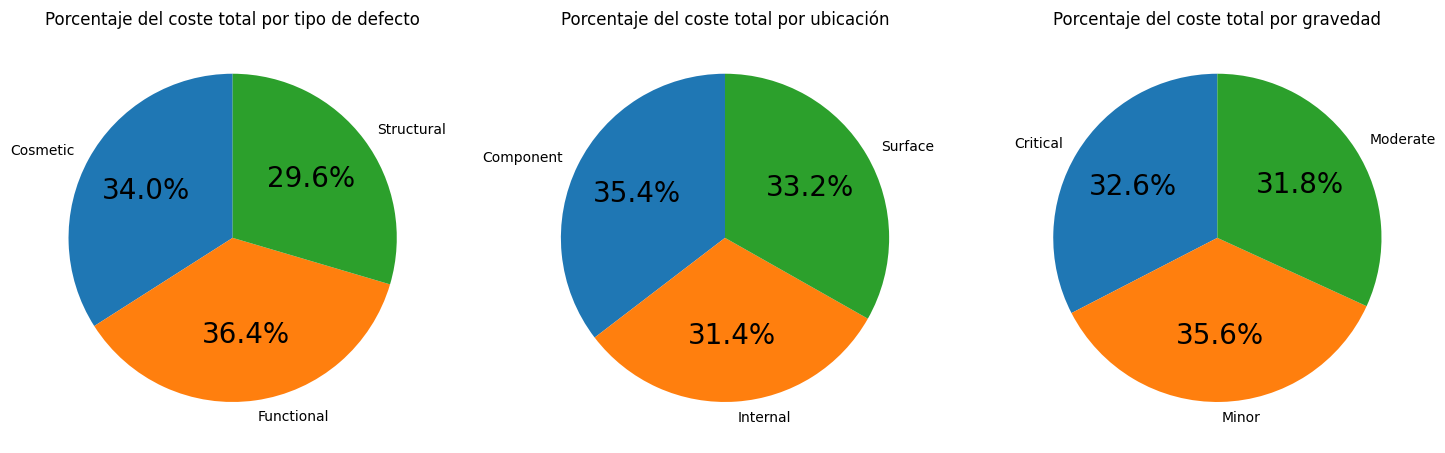

Very High


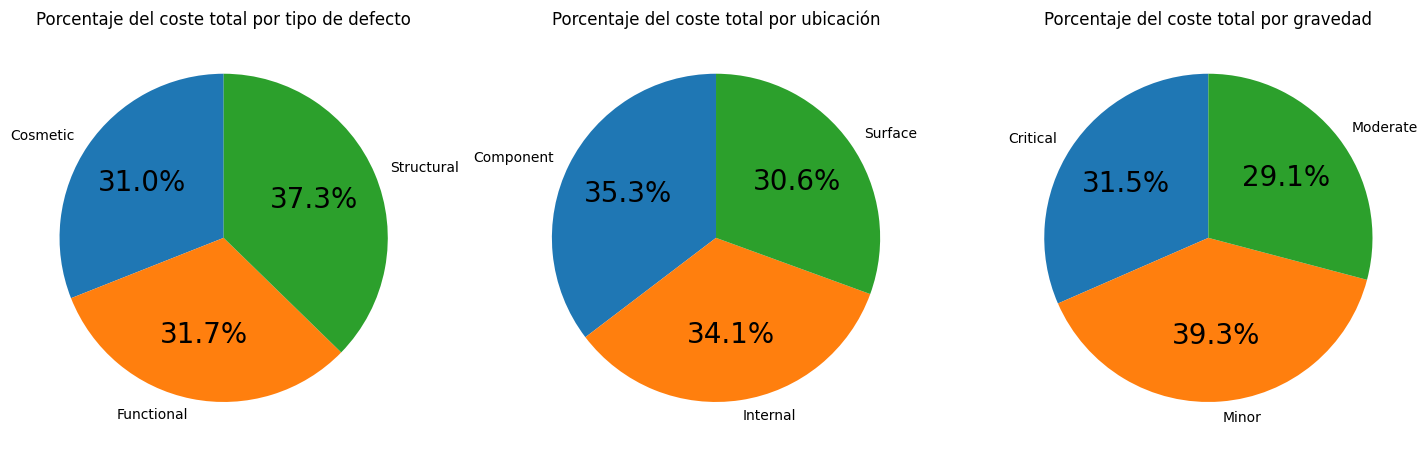

In [16]:
#mostramos los graficos para ver los porcentajes de cada categoria del coste total sobre:
# Tipo 
# Ubicacion 
# Gravedad 

list_cost_category=["Very Low","Low","Medium","High","Very High"]

for categoria in list_cost_category:
    df_temp=df[df['cost_category']==categoria]
    print(categoria)
    plot_donut_df(df_temp)


In [61]:
valores_unicos = {col: df[col].nunique() for col in df.columns}

In [27]:
valores_unicos.keys()

dict_keys(['defect_id', 'product_id', 'defect_type', 'defect_date', 'defect_location', 'severity', 'inspection_method', 'repair_cost'])

In [28]:
df.head()

,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
0,1,15,Structural,6/6/2024,Component,Minor,Visual Inspection,245.47
1,2,6,Functional,4/26/2024,Component,Minor,Visual Inspection,26.87
2,3,84,Structural,2/15/2024,Internal,Minor,Automated Testing,835.81
3,4,10,Functional,3/28/2024,Internal,Critical,Automated Testing,444.47
4,5,14,Cosmetic,4/26/2024,Component,Minor,Manual Testing,823.64


In [29]:
df
valores_unicos = {col: df[col].nunique() for col in df.columns}

In [30]:
valores_unicos

{'defect_id': 1000,
 'product_id': 100,
 'defect_type': 3,
 'defect_date': 182,
 'defect_location': 3,
 'severity': 3,
 'inspection_method': 3,
 'repair_cost': 996}

In [32]:
df.defect_location.value_counts()

defect_location
Surface      353
Component    326
Internal     321
Name: count, dtype: int64

In [33]:
df.defect_type.value_counts()

defect_type
Structural    352
Functional    339
Cosmetic      309
Name: count, dtype: int64

In [34]:
df.severity.value_counts()

severity
Minor       358
Critical    333
Moderate    309
Name: count, dtype: int64

In [49]:
df.head()

,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
0,1,15,Structural,6/6/2024,Component,Minor,Visual Inspection,245.47
1,2,6,Functional,4/26/2024,Component,Minor,Visual Inspection,26.87
2,3,84,Structural,2/15/2024,Internal,Minor,Automated Testing,835.81
3,4,10,Functional,3/28/2024,Internal,Critical,Automated Testing,444.47
4,5,14,Cosmetic,4/26/2024,Component,Minor,Manual Testing,823.64


In [25]:
print(df.defect_date.min())
print(df.defect_date.max())
print(df.defect_date.count())

1/10/2024
6/9/2024
200


In [110]:
df=product_id.describe()

NameError: name 'product_id' is not defined

In [ ]:
df_prod

In [113]:
#sns.boxplot(data=df, x='product_id', y='repair_cost')
df.product_id.describe()

count    1000.000000
mean       50.837000
std        29.480935
min         1.000000
25%        26.000000
50%        51.000000
75%        77.000000
max       100.000000
Name: product_id, dtype: float64

In [126]:
# Contar las incidencias por producto
incidences_by_product = df.groupby('product_id')['repair_cost'].count()

# Calcular la mediana de las incidencias
median_incidences = incidences_by_product.median()

# Filtrar los productos con incidencias mayores a la mediana
products_above_median = incidences_by_product[incidences_by_product > median_incidences]

# Crear una copia del DataFrame original con solo los productos filtrados
df_above_median = df[df['product_id'].isin(products_above_median.index)].copy()

# Verificar los primeros registros del DataFrame filtrado
df_above_median.head()



,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
1,2,6,Functional,4/26/2024,Component,Minor,Visual Inspection,26.87
3,4,10,Functional,3/28/2024,Internal,Critical,Automated Testing,444.47
4,5,14,Cosmetic,4/26/2024,Component,Minor,Manual Testing,823.64
5,6,17,Functional,5/11/2024,Internal,Moderate,Visual Inspection,788.11
7,8,90,Structural,1/15/2024,Internal,Moderate,Manual Testing,65.56


In [ ]:
list_cost_category=["Very Low","Low","Medium","High","Very High"]

for categoria in list_cost_category:
    df_temp=df[df['cost_category']==categoria ]
    print(categoria)
    plot_donut_df(df_temp)

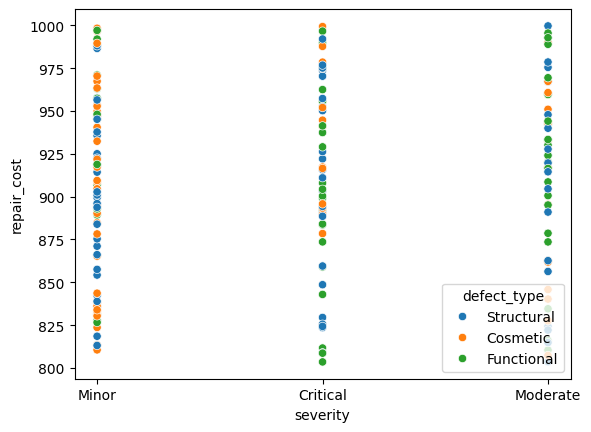

In [27]:
sns.scatterplot(x='severity', y='repair_cost', data=df, hue='defect_type');
